In [136]:
import numpy as np
from ase.io.trajectory import Trajectory
from ase.visualize import view
from glob import glob
sys.path.append('/media/rbnfiles/ruco/repos/atomistic-analysis/src')
from opendata import data
from pymatgen.io.ase import AseAtomsAdaptor
import pandas as pd

files = !ls ../../../../dft/pts2/2x2supercellPtS2/strain/Ansio2/*.traj
files = sorted(files)
df = pd.DataFrame([i.split('/')[-1].split('.traj')[0] for i in files[:-1]],columns=['File'])

no = 4
# display(df)
atoms = Trajectory(files[no])
# allatoms=[Trajectory(files[i]) for i in range(0,1) if i!= 3]
allatoms=[Trajectory(files[i]) for i in range(10)]
# alllabels=[df.iloc[i][0] for i in range(0,9)if i!=3]
alllabels=[df.iloc[i][0] for i in range(10)]
structure = AseAtomsAdaptor.get_structure(atoms[0])
count=0
for i in atoms:
    count+=1

df.sort_values(by=['File'],ascending=False)

,File
9,Opt_VacPt_PtS2_0.008
8,Opt_VacPt_PtS2_0.006
7,Opt_VacPt_PtS2_0.004
6,Opt_VacPt_PtS2_0.002
5,Opt_VacPt_PtS2_0.0
4,Opt_VacPt_PtS2_-0.01
3,Opt_VacPt_PtS2_-0.008
2,Opt_VacPt_PtS2_-0.006
1,Opt_VacPt_PtS2_-0.004
0,Opt_VacPt_PtS2_-0.002


In [132]:
sorted(files[:-1])

['../../../../dft/pts2/2x2supercellPtS2/strain/Ansio2/Opt_VacPt_PtS2_-0.002.traj',
 '../../../../dft/pts2/2x2supercellPtS2/strain/Ansio2/Opt_VacPt_PtS2_-0.004.traj',
 '../../../../dft/pts2/2x2supercellPtS2/strain/Ansio2/Opt_VacPt_PtS2_-0.006.traj',
 '../../../../dft/pts2/2x2supercellPtS2/strain/Ansio2/Opt_VacPt_PtS2_-0.008.traj',
 '../../../../dft/pts2/2x2supercellPtS2/strain/Ansio2/Opt_VacPt_PtS2_-0.01.traj',
 '../../../../dft/pts2/2x2supercellPtS2/strain/Ansio2/Opt_VacPt_PtS2_0.0.traj',
 '../../../../dft/pts2/2x2supercellPtS2/strain/Ansio2/Opt_VacPt_PtS2_0.002.traj',
 '../../../../dft/pts2/2x2supercellPtS2/strain/Ansio2/Opt_VacPt_PtS2_0.004.traj',
 '../../../../dft/pts2/2x2supercellPtS2/strain/Ansio2/Opt_VacPt_PtS2_0.006.traj',
 '../../../../dft/pts2/2x2supercellPtS2/strain/Ansio2/Opt_VacPt_PtS2_0.008.traj']

In [137]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.animation as animation
from ase.visualize.plot import plot_atoms
from IPython.display import display, clear_output,HTML
plt.rcParams["animation.html"] = "jshtml"
plt.rcParams["font.family"] = "serif"

ncols = 4
nrows=(len(allatoms)/ncols) if isinstance(len(allatoms)/ncols, int)==False else int((len(allatoms)/ncols)+1)
nrows=3

fig, ax = plt.subplots(nrows,ncols,figsize=(10,7),frameon=True,facecolor='black')
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
            hspace = 0, wspace = 0)
def alltrajs(frame):
    count=0
    for i in range(nrows):
        for j in range(ncols):
            ax[i,j].clear()
            ax[i,j].set_axis_off()
            if count < len(allatoms):
                ax[i,j].set_title(alllabels[count])
                plot_atoms(allatoms[count][frame],ax[i,j],radii=0.5)
                count+=1
            # else:
            #     fig.delaxes(ax[i,j])
            #     break
    return fig

def animate(frame):
    clear_output(wait=True)
    print("Run Frame No. :",frame)
    return alltrajs(frame)

plt.tight_layout()
plt.show()

#animate(31)
anim = animation.FuncAnimation(fig,animate,frames=np.arange(0,1))
anim

Run Frame No. : 0


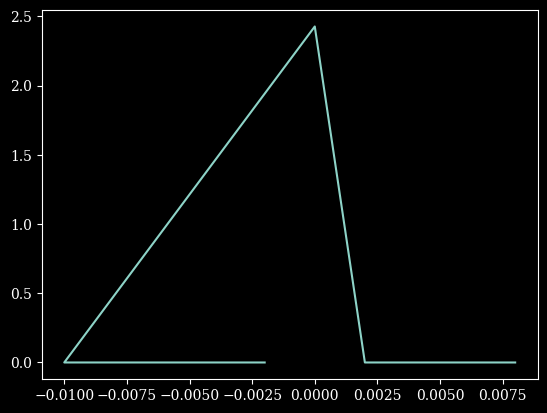

In [138]:
anatoms = []
for i,j in zip(allatoms,alllabels):
    anatoms.append([i[-1].get_magnetic_moment(),float(j.split('_')[-1])])
anatoms = np.array(anatoms)


plt.plot(anatoms[:,1],anatoms[:,0])

In [131]:
anatoms

array([[-4.71197882e-13, -2.00000000e-03],
       [-2.21601793e-10,  2.00000000e-03],
       [ 1.08014933e-11, -4.00000000e-03],
       [ 4.73505679e-11,  4.00000000e-03],
       [ 7.17873892e-12, -6.00000000e-03],
       [-5.50812729e-11,  6.00000000e-03],
       [ 3.62919551e-12, -8.00000000e-03],
       [ 9.97957272e-11,  8.00000000e-03],
       [ 2.18966895e-12, -1.00000000e-02],
       [ 2.42732885e+00,  0.00000000e+00]])

In [104]:
np.sort(anatoms,axis=0)

array([[-2.21601793e-10, -1.00000000e-02],
       [-5.50812729e-11, -8.00000000e-03],
       [-4.71197882e-13, -6.00000000e-03],
       [ 2.18966895e-12, -4.00000000e-03],
       [ 3.62919551e-12, -2.00000000e-03],
       [ 7.17873892e-12,  0.00000000e+00],
       [ 1.08014933e-11,  2.00000000e-03],
       [ 4.73505679e-11,  4.00000000e-03],
       [ 9.97957272e-11,  6.00000000e-03],
       [ 2.42732885e+00,  8.00000000e-03]])